<a href="https://colab.research.google.com/github/bandisushmitha/pyton_cls25/blob/main/lakshmandiwartask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2025-01-21 17:06:57.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-21 17:06:57.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

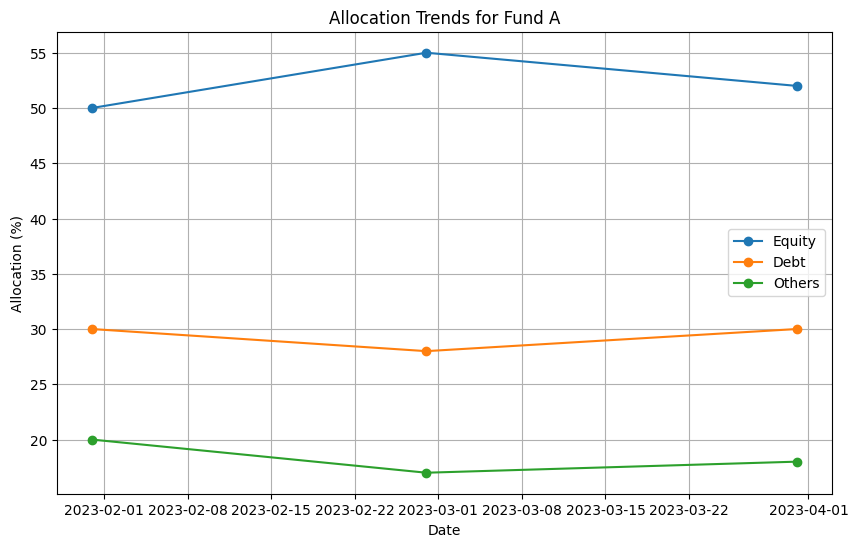

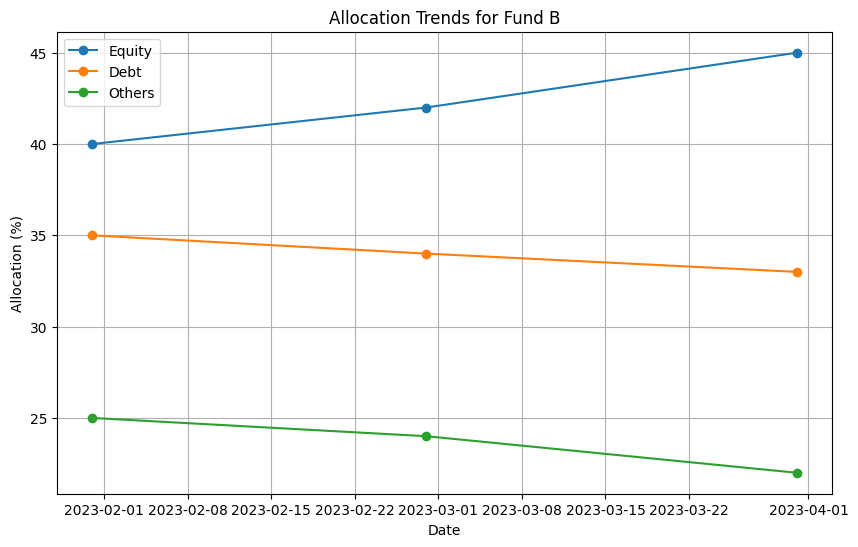

In [4]:
!pip install pandas streamlit matplotlib

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

# Sample Mutual Fund Data (replace with actual dataset)
# Columns: Fund, Date, Allocation_Equity, Allocation_Debt, Allocation_Others
data = {
    "Fund": ["Fund A", "Fund A", "Fund A", "Fund B", "Fund B", "Fund B"],
    "Date": [
        "2023-01-01", "2023-02-01", "2023-03-01",
        "2023-01-01", "2023-02-01", "2023-03-01"
    ],
    "Allocation_Equity": [50, 55, 52, 40, 42, 45],
    "Allocation_Debt": [30, 28, 30, 35, 34, 33],
    "Allocation_Others": [20, 17, 18, 25, 24, 22],
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])

# Streamlit App
st.title("Mutual Fund Allocation Tracker")

# Sidebar: User Inputs
st.sidebar.header("Filter Options")
selected_funds = st.sidebar.multiselect("Select Funds", df["Fund"].unique(), default=df["Fund"].unique())
date_range = st.sidebar.date_input(
    "Select Date Range",
    [df["Date"].min(), df["Date"].max()],
    min_value=df["Date"].min(),
    max_value=df["Date"].max()
)

# Filter Data
# Filter Data
filtered_df = df[(df["Fund"].isin(selected_funds)) & (df["Date"].between(pd.Timestamp(date_range[0]), pd.Timestamp(date_range[1])))]

# Group Data by Fund and Month
grouped_df = filtered_df.groupby(["Fund", pd.Grouper(key="Date", freq="M")]).mean().reset_index()

# Display Data Table
st.subheader("Monthly Allocation Changes")
st.dataframe(grouped_df)

# Plot Allocation Trends
st.subheader("Allocation Trends by Fund")
for fund in selected_funds:
    fund_data = grouped_df[grouped_df["Fund"] == fund]
    plt.figure(figsize=(10, 6))
    plt.plot(fund_data["Date"], fund_data["Allocation_Equity"], label="Equity", marker="o")
    plt.plot(fund_data["Date"], fund_data["Allocation_Debt"], label="Debt", marker="o")
    plt.plot(fund_data["Date"], fund_data["Allocation_Others"], label="Others", marker="o")
    plt.title(f"Allocation Trends for {fund}")
    plt.xlabel("Date")
    plt.ylabel("Allocation (%)")
    plt.legend()
    plt.grid()
    st.pyplot(plt)
